## Step 5 – Evaluate Model - Task 1. Evaluate Regression Model - CLASS ASSIGNMENT


### Load Libraries


In [1]:
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [1]:
import pandas as pd
import numpy as np

from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/asathi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/asathi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=

### Set up environment and connect to Google Drive

In [2]:
using_Google_colab = False
using_Anaconda_on_Mac_or_Linux = True
using_Anaconda_on_windows = False

In [3]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

## EM5.1 Open Notebook,  upload the county Analytics Base Table, and find maximum incremental cases Jan-Jun 


### Upload State level Data


In [4]:
if using_Google_colab:
  abt_by_county = pd.read_csv('/content/drive/MyDrive/COVID_Project/output/abt_by_county.csv',
                              parse_dates=['Date'])
if using_Anaconda_on_Mac_or_Linux:
  abt_by_county = pd.read_csv('../output/abt_by_county.csv',
                              parse_dates=['Date'])
if using_Anaconda_on_windows:
  abt_by_county = pd.read_csv(r'..\output\abt_by_county.csv',
                              parse_dates=['Date'])
abt_by_county

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,County Name,countyFIPS,State,stateFIPS,Date,Total Cases,Incremental Cases,...,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,0,334,Kent County,10001,DE,10,2020-01-22,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,335,Kent County,10001,DE,10,2020-01-23,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,336,Kent County,10001,DE,10,2020-01-24,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,337,Kent County,10001,DE,10,2020-01-25,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,338,Kent County,10001,DE,10,2020-01-26,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,339,Kent County,10001,DE,10,2020-01-27,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,340,Kent County,10001,DE,10,2020-01-28,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,341,Kent County,10001,DE,10,2020-01-29,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8,342,Kent County,10001,DE,10,2020-01-30,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,343,Kent County,10001,DE,10,2020-01-31,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filter maximum incremetal cases in Jan - Jun

1. Filter data for first half
2. Attach state to county name
3. find max incremental cases

In [5]:
abt_by_county_Incremental_Cases = abt_by_county[['Date', 'countyFIPS', 'County Name', 'State', 'Incremental Cases', 'population']]
abt_by_county_Incremental_Cases['County Name'] = abt_by_county_Incremental_Cases['County Name'] + " " + abt_by_county_Incremental_Cases['State']
abt_by_county_Incremental_Cases

,Date,countyFIPS,County Name,State,Incremental Cases,population
0,2020-01-22,10001,Kent County DE,DE,NaN,180786
1,2020-01-23,10001,Kent County DE,DE,0.0,180786
2,2020-01-24,10001,Kent County DE,DE,0.0,180786
3,2020-01-25,10001,Kent County DE,DE,0.0,180786
4,2020-01-26,10001,Kent County DE,DE,0.0,180786
5,2020-01-27,10001,Kent County DE,DE,0.0,180786
6,2020-01-28,10001,Kent County DE,DE,0.0,180786
7,2020-01-29,10001,Kent County DE,DE,0.0,180786
8,2020-01-30,10001,Kent County DE,DE,0.0,180786
9,2020-01-31,10001,Kent County DE,DE,0.0,180786


In [6]:
max_cases = abt_by_county_Incremental_Cases[abt_by_county_Incremental_Cases['Date'] < '2020-07-01']
max_cases = max_cases.groupby(['countyFIPS', 'County Name']).agg({'Incremental Cases': 'max',
                                                 'population': 'min'}).reset_index() 
max_cases

,countyFIPS,County Name,Incremental Cases,population
0,1001,Autauga County AL,26.0,55869
1,1003,Baldwin County AL,68.0,223234
2,1005,Barbour County AL,17.0,24686
3,1007,Bibb County AL,8.0,22394
4,1009,Blount County AL,10.0,57826
5,1011,Bullock County AL,30.0,10101
6,1013,Butler County AL,28.0,19448
7,1015,Calhoun County AL,24.0,113605
8,1017,Chambers County AL,38.0,33254
9,1019,Cherokee County AL,6.0,26196


## EM5.2 Develop regression model for top 50 counties and create test data  predictions


### Sort the data by population and select top 50 counties

In [7]:
max_cases_sorted = max_cases.sort_values(by=['population'], ascending=False)
top_50 = max_cases_sorted[:50]
top_50

,countyFIPS,County Name,Incremental Cases,population
206,6037,Los Angeles County CA,2878.0,10039107
612,17031,Cook County IL,2155.0,5150233
2625,48201,Harris County TX,1994.0,4713325
104,4013,Maricopa County AZ,3414.0,4485414
224,6073,San Diego County CA,530.0,3338330
217,6059,Orange County CA,779.0,3175692
364,12086,Miami-Dade County FL,2152.0,2716940
2581,48113,Dallas County TX,572.0,2635516
1853,36047,Kings County NY,2663.0,2559903
220,6065,Riverside County CA,1022.0,2470546


In [8]:
x_50 = top_50['population'].values
y_50 = top_50['Incremental Cases'].values





In [9]:
X_50 = x_50.reshape(-1,1)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, 
                                                                test_size=0.2, 
                                                                random_state=0)
regressor_50 = LinearRegression()  
regressor_50.fit(X_train_50, y_train_50)
rsq = regressor_50.score(X_train_50, y_train_50)
print("Intercept: ", 
      regressor_50.intercept_, 
      "Coefficient: ", regressor_50.coef_, 
      "R-SQ: ", rsq)

Intercept:  268.06822989939155 Coefficient:  [0.00033259] R-SQ:  0.37846875796843815


## EM5.3 Evaluate regression model using test data results


In [10]:
y_predict_50 = regressor_50.predict(X_test_50)

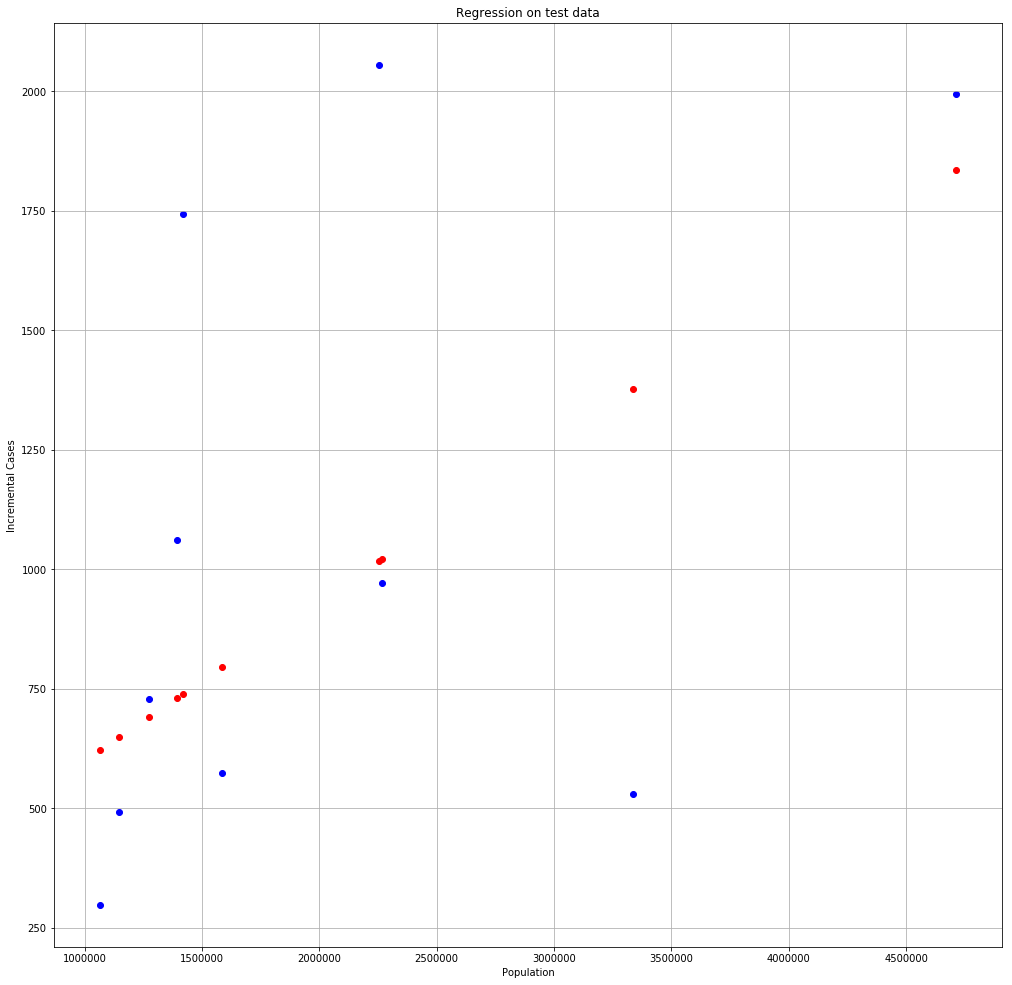

In [11]:
fig, ax = plt.subplots(figsize=(17, 17))

plt.title('Regression on test data')
plt.ylabel('Incremental Cases')
plt.xlabel('Population')
#plt.yscale('log')
#plt.xscale('log')
ax.scatter(X_test_50, y_test_50, color='b')
ax.scatter(X_test_50, y_predict_50, color='r')
plt.grid(True)
plt.show()

In [12]:
mean_squared_error(y_test_50, y_predict_50)

312127.02680980944

In [14]:
r2_score(y_test_50, y_predict_50)

0.19282397356630576

## EM5.4 Extend evaluation to top 2,000 counties


### Now try the whole population


In [13]:
top_2000 = max_cases_sorted[:2000]
x_2000 = top_2000['population'].values
y_2000 = top_2000['Incremental Cases'].values


In [14]:

X_2000 = x_2000.reshape(-1,1)
X_train_2000, X_test_2000, y_train_2000, y_test_2000 = train_test_split(X_2000, 
                                                                        y_2000, 
                                                                        test_size=0.2, 
                                                                        random_state=0)
regressor_2000 = LinearRegression()  
regressor_2000.fit(X_train_2000, y_train_2000)
rsq_2000 = regressor_2000.score(X_train_2000, y_train_2000)
print("Intercept: ", 
      regressor_2000.intercept_, 
      "Coefficient: ", regressor_2000.coef_, 
      "R-SQ: ", rsq_2000)

Intercept:  8.178619259102206 Coefficient:  [0.00042705] R-SQ:  0.6097038767780065


In [15]:
y_predict_2000 = regressor_2000.predict(X_test_2000)

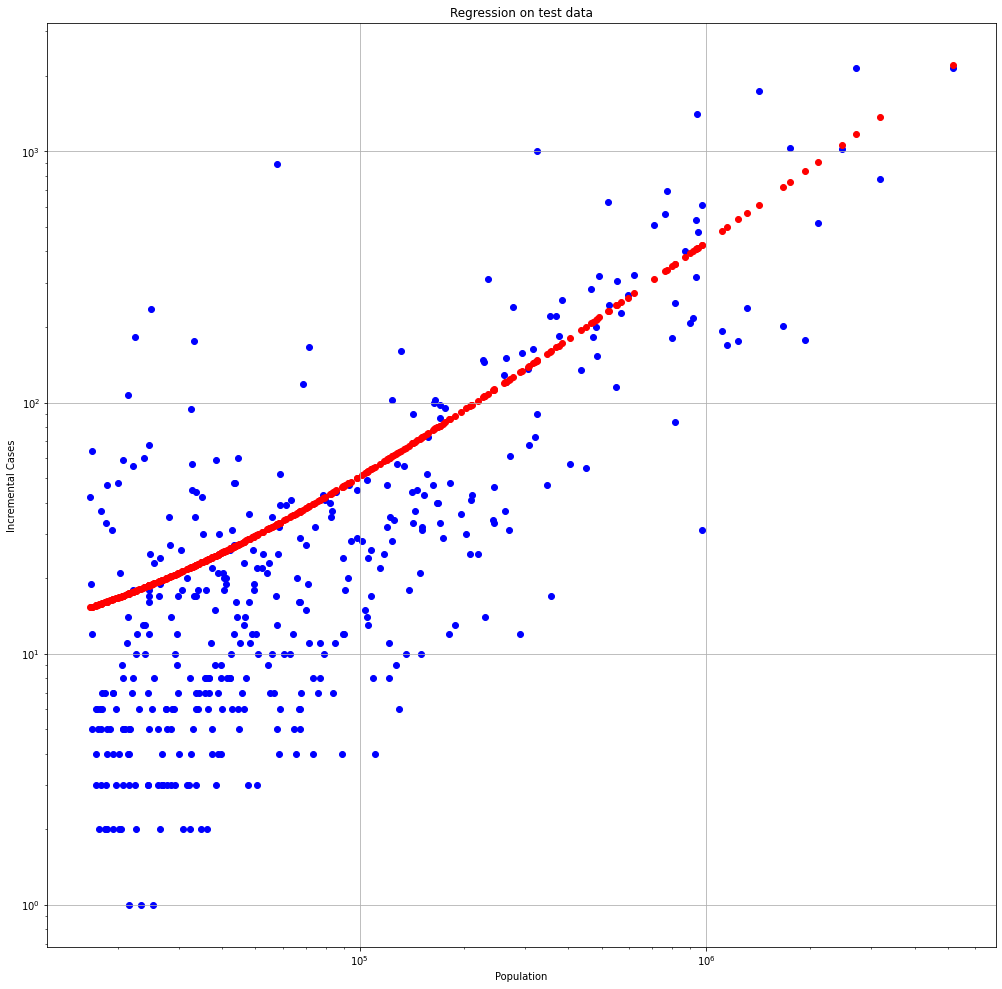

In [18]:
fig, ax = plt.subplots(figsize=(17, 17))

plt.title('Regression on test data')
plt.ylabel('Incremental Cases')
plt.xlabel('Population')
plt.yscale('log')
plt.xscale('log')
ax.scatter(X_test_2000, y_test_2000, color='b')
ax.scatter(X_test_2000, y_predict_2000, color='r')
plt.grid(True)
plt.show()

In [16]:
mean_squared_error(y_test_2000, y_predict_2000)

19438.029454016472

In [17]:
r2_score(y_test_2000, y_predict_2000)

0.6308558139913206

## EM5.5 Conduct regression exercise for incremental cases by county for Jul-Dec and evaluate  regression model for top 50 counties and extend to 2000 counties  - CLASS ASSIGNMENT	

In [18]:
max_cases = abt_by_county_Incremental_Cases[abt_by_county_Incremental_Cases['Date'] > '2020-07-01']
max_cases = max_cases.groupby(['countyFIPS', 'County Name']).agg({'Incremental Cases': 'max',
                                                 'population': 'min'}).reset_index() 
max_cases

,countyFIPS,County Name,Incremental Cases,population
0,1001,Autauga County AL,97.0,55869
1,1003,Baldwin County AL,409.0,223234
2,1005,Barbour County AL,22.0,24686
3,1007,Bibb County AL,100.0,22394
4,1009,Blount County AL,140.0,57826
5,1011,Bullock County AL,18.0,10101
6,1013,Butler County AL,43.0,19448
7,1015,Calhoun County AL,343.0,113605
8,1017,Chambers County AL,48.0,33254
9,1019,Cherokee County AL,37.0,26196


In [19]:
max_cases_sorted = max_cases.sort_values(by=['population'], ascending=False)
top_50 = max_cases_sorted[:50]
top_50

,countyFIPS,County Name,Incremental Cases,population
206,6037,Los Angeles County CA,22236.0,10039107
612,17031,Cook County IL,6697.0,5150233
2625,48201,Harris County TX,14129.0,4713325
104,4013,Maricopa County AZ,8332.0,4485414
224,6073,San Diego County CA,4622.0,3338330
217,6059,Orange County CA,4606.0,3175692
364,12086,Miami-Dade County FL,4141.0,2716940
2581,48113,Dallas County TX,5361.0,2635516
1853,36047,Kings County NY,1349.0,2559903
220,6065,Riverside County CA,10949.0,2470546


In [20]:
x_50 = top_50['population'].values
y_50 = top_50['Incremental Cases'].values

In [21]:
X_50 = x_50.reshape(-1,1)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, 
                                                                test_size=0.2, 
                                                                random_state=0)
regressor_50 = LinearRegression()  
regressor_50.fit(X_train_50, y_train_50)
rsq = regressor_50.score(X_train_50, y_train_50)
print("Intercept: ", 
      regressor_50.intercept_, 
      "Coefficient: ", regressor_50.coef_, 
      "R-SQ: ", rsq)

Intercept:  -767.7669826959127 Coefficient:  [0.00214608] R-SQ:  0.7157314268857965


In [22]:
y_predict_50 = regressor_50.predict(X_test_50)

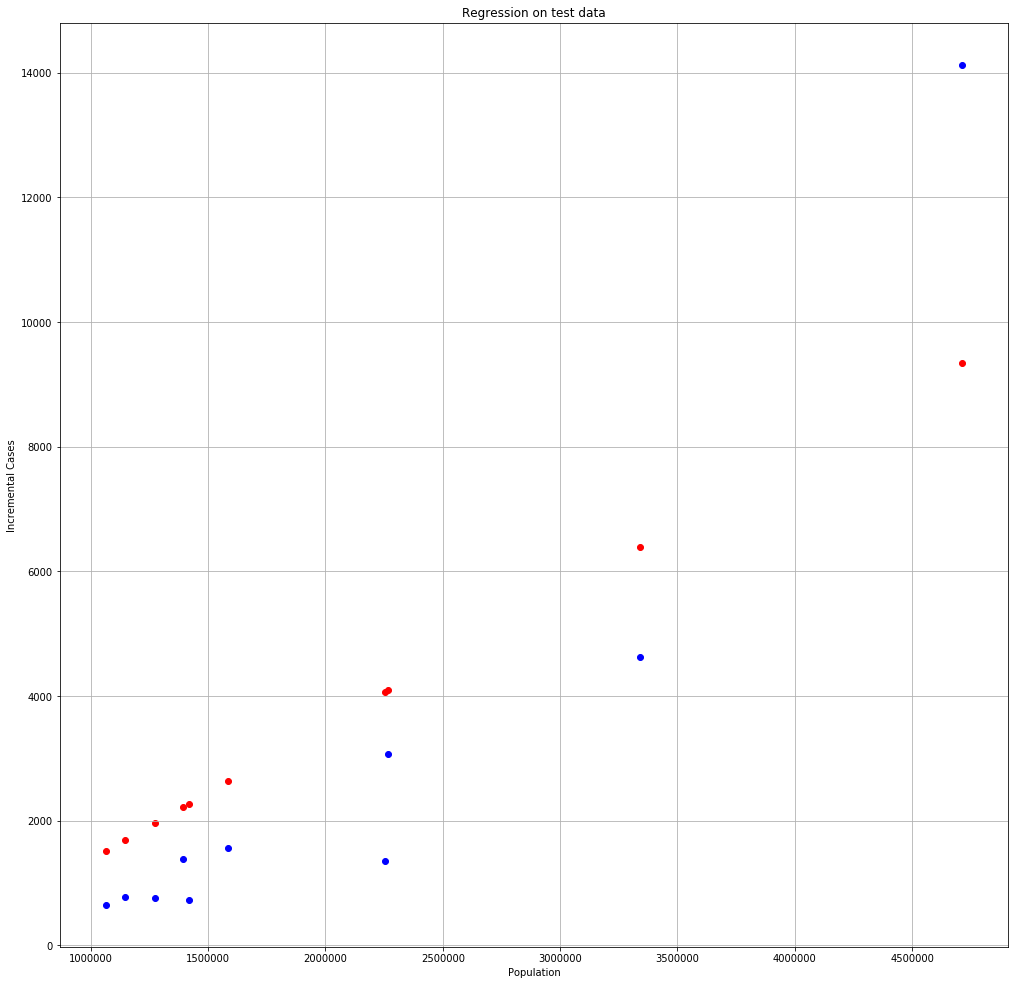

In [23]:
fig, ax = plt.subplots(figsize=(17, 17))

plt.title('Regression on test data')
plt.ylabel('Incremental Cases')
plt.xlabel('Population')
#plt.yscale('log')
#plt.xscale('log')
ax.scatter(X_test_50, y_test_50, color='b')
ax.scatter(X_test_50, y_predict_50, color='r')
plt.grid(True)
plt.show()

In [24]:
mean_squared_error(y_test_50, y_predict_50)

4177272.9170225845

In [25]:
r2_score(y_test_50, y_predict_50)

0.7295283231748435

In [26]:
top_2000 = max_cases_sorted[:2000]
x_2000 = top_2000['population'].values
y_2000 = top_2000['Incremental Cases'].values

In [27]:
X_2000 = x_2000.reshape(-1,1)
X_train_2000, X_test_2000, y_train_2000, y_test_2000 = train_test_split(X_2000, 
                                                                        y_2000, 
                                                                        test_size=0.2, 
                                                                        random_state=0)
regressor_2000 = LinearRegression()  
regressor_2000.fit(X_train_2000, y_train_2000)
rsq_2000 = regressor_2000.score(X_train_2000, y_train_2000)
print("Intercept: ", 
      regressor_2000.intercept_, 
      "Coefficient: ", regressor_2000.coef_, 
      "R-SQ: ", rsq_2000)

Intercept:  -0.4899982350861478 Coefficient:  [0.00194013] R-SQ:  0.7725874145982692


In [28]:
y_predict_2000 = regressor_2000.predict(X_test_2000)

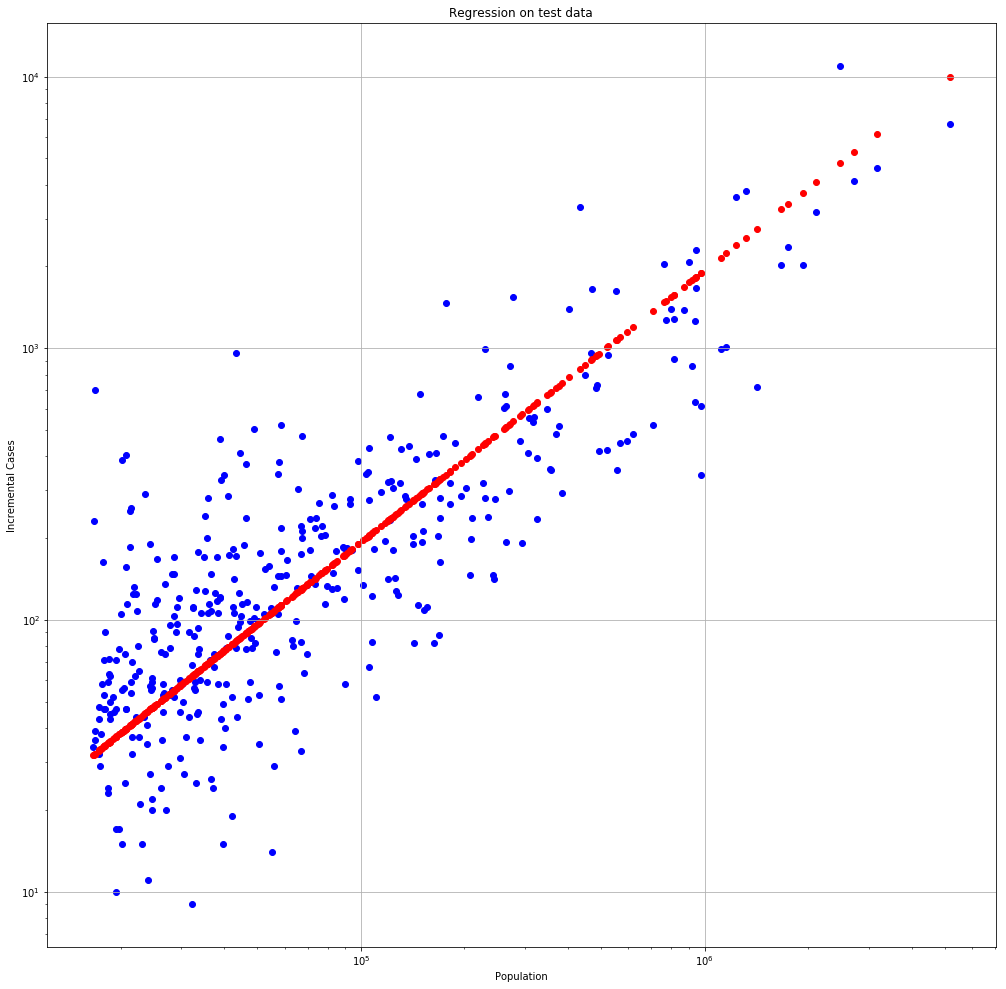

In [29]:
fig, ax = plt.subplots(figsize=(17, 17))

plt.title('Regression on test data')
plt.ylabel('Incremental Cases')
plt.xlabel('Population')
plt.yscale('log')
plt.xscale('log')
ax.scatter(X_test_2000, y_test_2000, color='b')
ax.scatter(X_test_2000, y_predict_2000, color='r')
plt.grid(True)
plt.show()

In [30]:
mean_squared_error(y_test_2000, y_predict_2000)

240471.7088591109

In [31]:
r2_score(y_test_2000, y_predict_2000)

0.6576210387189174

## EM5.6 Create a model with the entire year for 50 and 2,000 counties for incremental cases and deaths. Compare regression results in EM5.3, 5.4 and 5.5.  What was your finding? - CLASS ASSIGNMENT

In [32]:
max_cases = abt_by_county_Incremental_Cases[abt_by_county_Incremental_Cases['Date'] > '2020-01-01']
max_cases = max_cases.groupby(['countyFIPS', 'County Name']).agg({'Incremental Cases': 'max',
                                                 'population': 'min'}).reset_index() 
max_cases

,countyFIPS,County Name,Incremental Cases,population
0,1001,Autauga County AL,97.0,55869
1,1003,Baldwin County AL,409.0,223234
2,1005,Barbour County AL,22.0,24686
3,1007,Bibb County AL,100.0,22394
4,1009,Blount County AL,140.0,57826
5,1011,Bullock County AL,30.0,10101
6,1013,Butler County AL,43.0,19448
7,1015,Calhoun County AL,343.0,113605
8,1017,Chambers County AL,48.0,33254
9,1019,Cherokee County AL,37.0,26196


In [33]:
max_cases_sorted = max_cases.sort_values(by=['population'], ascending=False)
top_50 = max_cases_sorted[:50]
top_50

,countyFIPS,County Name,Incremental Cases,population
206,6037,Los Angeles County CA,22236.0,10039107
612,17031,Cook County IL,6697.0,5150233
2625,48201,Harris County TX,14129.0,4713325
104,4013,Maricopa County AZ,8332.0,4485414
224,6073,San Diego County CA,4622.0,3338330
217,6059,Orange County CA,4606.0,3175692
364,12086,Miami-Dade County FL,4141.0,2716940
2581,48113,Dallas County TX,5361.0,2635516
1853,36047,Kings County NY,2663.0,2559903
220,6065,Riverside County CA,10949.0,2470546


In [34]:
x_50 = top_50['population'].values
y_50 = top_50['Incremental Cases'].values

In [35]:
X_50 = x_50.reshape(-1,1)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X_50, y_50, 
                                                                test_size=0.2, 
                                                                random_state=0)
regressor_50 = LinearRegression()  
regressor_50.fit(X_train_50, y_train_50)
rsq = regressor_50.score(X_train_50, y_train_50)
print("Intercept: ", 
      regressor_50.intercept_, 
      "Coefficient: ", regressor_50.coef_, 
      "R-SQ: ", rsq)

Intercept:  -616.9630328444082 Coefficient:  [0.00213246] R-SQ:  0.728559613974757


In [36]:
y_predict_50 = regressor_50.predict(X_test_50)

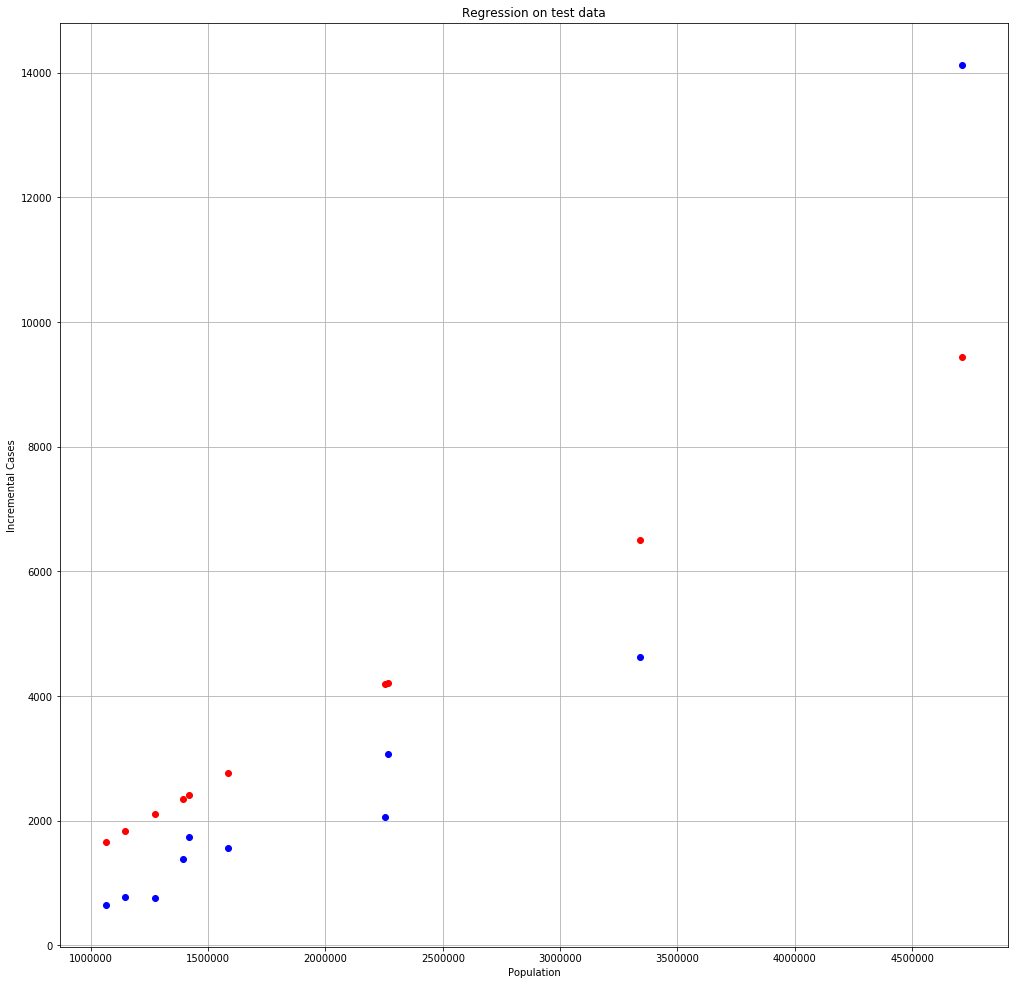

In [37]:
fig, ax = plt.subplots(figsize=(17, 17))

plt.title('Regression on test data')
plt.ylabel('Incremental Cases')
plt.xlabel('Population')
#plt.yscale('log')
#plt.xscale('log')
ax.scatter(X_test_50, y_test_50, color='b')
ax.scatter(X_test_50, y_predict_50, color='r')
plt.grid(True)
plt.show()

In [38]:
mean_squared_error(y_test_50, y_predict_50)

3815411.863525731

In [39]:
r2_score(y_test_50, y_predict_50)

0.7439719065323982

In [40]:
top_2000 = max_cases_sorted[:2000]
x_2000 = top_2000['population'].values
y_2000 = top_2000['Incremental Cases'].values

In [41]:
X_2000 = x_2000.reshape(-1,1)
X_train_2000, X_test_2000, y_train_2000, y_test_2000 = train_test_split(X_2000, 
                                                                        y_2000, 
                                                                        test_size=0.2, 
                                                                        random_state=0)
regressor_2000 = LinearRegression()  
regressor_2000.fit(X_train_2000, y_train_2000)
rsq_2000 = regressor_2000.score(X_train_2000, y_train_2000)
print("Intercept: ", 
      regressor_2000.intercept_, 
      "Coefficient: ", regressor_2000.coef_, 
      "R-SQ: ", rsq_2000)

Intercept:  1.6933535256161463 Coefficient:  [0.00197711] R-SQ:  0.7922895248879984


In [42]:
y_predict_2000 = regressor_2000.predict(X_test_2000)

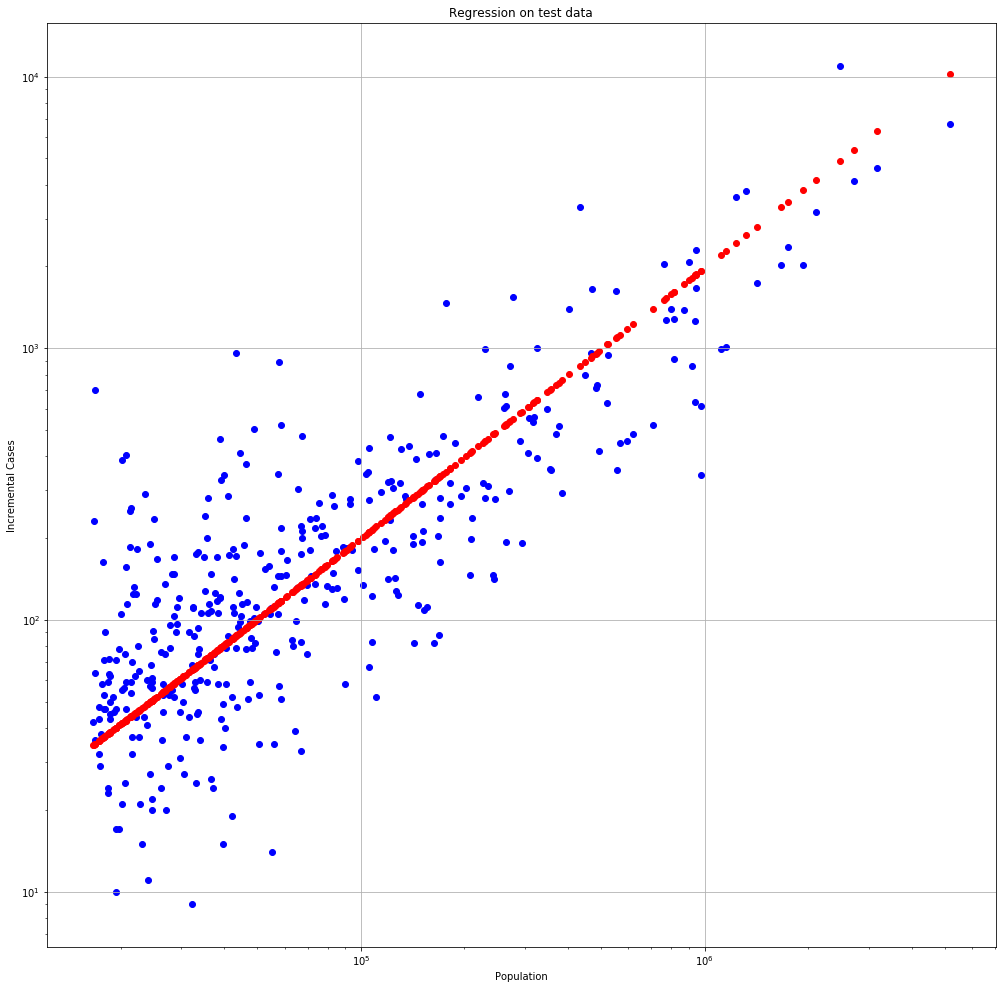

In [43]:
fig, ax = plt.subplots(figsize=(17, 17))

plt.title('Regression on test data')
plt.ylabel('Incremental Cases')
plt.xlabel('Population')
plt.yscale('log')
plt.xscale('log')
ax.scatter(X_test_2000, y_test_2000, color='b')
ax.scatter(X_test_2000, y_predict_2000, color='r')
plt.grid(True)
plt.show()

In [44]:
mean_squared_error(y_test_2000, y_predict_2000)

238794.76268386512

In [45]:
r2_score(y_test_2000, y_predict_2000)

0.6628072987596557